### pip install & import

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
#import pandas_profiling
import datetime

In [2]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import MinMaxScaler

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestRegressor

# from xgboost import XGBRFRegressor
from sklearn.model_selection import cross_validate

### 최종데이터 불러오기

In [3]:
movie_final_회귀 = pd.read_csv('../3_merge_top300/movie_final_reg.csv',encoding='utf-8')
movie_final_분류 = pd.read_csv('../3_merge_top300/movie_final_cls.csv',encoding='utf-8')

In [4]:
movie_final_회귀

,Unnamed: 0,순번,영화명,감독,배급사,개봉일,영화형태,국적,전국 스크린수,전국 매출액,...,연도,월,계절,총 관객수,코로나,출연,평점,감독_흥행,배급사_흥행,주연배우_흥행
0,0,2575,미니특공대X,이영준,삼지애니메이션,2018-03-22,장편,한국,458,744858200,...,2018,3,봄,216385269,0,"['엄상현', '전태열', '이소영', '신용우']",7.55,0,0,0
1,1,2578,알파독,닉 카사베츠,싸이더스,2009-01-29,장편,미국,161,648950794,...,2009,1,겨울,155398654,0,"['에밀 허쉬', '저스틴 팀버레이크', '벤 포스터', '안톤 옐친', '아만다 ...",6.06,0,6,6
2,2,2583,엘비스,바즈 루어만,워너브러더스 코리아,2022-07-13,장편,미국,665,1070700628,...,2022,7,여름,112805094,1,"['오스틴 버틀러', '톰 행크스']",8.83,0,10,5
3,3,2584,라이언,가스 데이비스,이수C&E,2017-02-01,장편,기타,205,736334100,...,2017,2,겨울,219876227,0,"['데브 파텔', '루니 마라', '니콜 키드먼', '데이비드 웬햄', '써니 파와르']",9.24,0,0,0
4,4,2585,로덴시아: 마법왕국의 전설,데이비드 비스바노,영화사 빅,2013-10-02,장편,기타,221,632768500,...,2013,10,가을,213351030,0,"['헤르난 브라보', '나탈리아 로스미나티', '엔리크 포셀라나', '리카르도 알라...",7.43,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1408,1408,4856,안티고네,소피 드라스프,그린나래미디어,2020-11-19,장편,기타,130,88869360,...,2020,11,가을,59523967,1,"['나에마 리치', '라와드 엘-제인', '앙투안느 데로쉬에']",8.05,0,0,0
1409,1409,4858,신문기자,후지이 미치히토,팝엔터테인먼트,2019-10-17,장편,일본,128,81471660,...,2019,10,가을,226678777,0,"['심은경', '마츠자카 토리']",8.01,0,0,9
1410,1410,4859,사랑은 비가 갠 뒤처럼,나가이 아키라,디스테이션,2019-02-07,장편,일본,100,84113620,...,2019,2,겨울,226678777,0,"['고마츠 나나', '오오이즈미 요']",8.77,0,8,0
1411,1411,4860,극장판 시그널,하시모토 하지메,트윈플러스파트너스,2022-03-31,장편,일본,90,61115200,...,2022,3,봄,112805094,1,"['사카구치 켄타로', '키타무라 카즈키', '키치세 미치코']",6.16,0,0,0


## 원핫인코딩 

In [5]:
# 원핫인코딩

# movie_labels = pd.get_dummies(movie_final,columns = ['국적','장르','등급','계절'])

In [6]:
# 독립 변수와 종속 변수 나눔

# 독립 = movie_DL[['감독_흥행', '배급사_흥행', '국적_기타', '국적_독일', '국적_미국',
#        '국적_영국', '국적_일본', '국적_중국', '국적_프랑스', '국적_한국', '장르_SF', '장르_가족', '장르_공연',
#        '장르_공포(호러)', '장르_기타', '장르_다큐멘터리', '장르_드라마', '장르_멜로/로맨스', '장르_뮤지컬',
#        '장르_미스터리', '장르_범죄', '장르_사극', '장르_서부극(웨스턴)', '장르_성인물(에로)', '장르_스릴러',
#        '장르_애니메이션', '장르_액션', '장르_어드벤처', '장르_전쟁', '장르_코미디', '장르_판타지',
#        '등급_12세관람가', '등급_15세관람가', '등급_전체관람가', '등급_청소년관람불가', '계절_가을', '계절_겨울',
#        '계절_봄', '계절_여름']] 
# 종속 = movie_DL[['전국 관객수']] 

# 스케일링

In [7]:
from sklearn.preprocessing import RobustScaler

# 객체생성
robust_scaler = RobustScaler()

# *** 만약 특정 열의 스케일링을 하고 싶은 경우 ***
A_n = robust_scaler.fit_transform(movie_final_회귀['전국 스크린수'].values.reshape(-1,1))
movie_final_회귀.insert(0, '전국 스크린수_1', A_n)
movie_final_회귀.drop(['전국 스크린수'], axis=1, inplace=True)

A_n1 = robust_scaler.fit_transform(movie_final_회귀['총 관객수'].values.reshape(-1,1))
movie_final_회귀.insert(0, '총 관객수_1', A_n1)
movie_final_회귀.drop(['총 관객수'], axis=1, inplace=True)

## 라벨링

In [8]:
from sklearn.preprocessing import LabelEncoder

le_form = LabelEncoder()
le_nation = LabelEncoder()
le_genre = LabelEncoder()
le_rating = LabelEncoder()
le_class = LabelEncoder()
le_season = LabelEncoder()

movie_labels = movie_final_회귀.copy()
movie_labels['영화형태'] = le_form.fit_transform(movie_final_회귀['영화형태'])
movie_labels['국적'] = le_nation.fit_transform(movie_final_회귀['국적'])
movie_labels['장르'] = le_genre.fit_transform(movie_final_회귀['장르'])
movie_labels['등급'] = le_rating.fit_transform(movie_final_회귀['등급'])
movie_labels['영화구분'] = le_class.fit_transform(movie_final_회귀['영화구분'])
movie_labels['계절'] = le_season.fit_transform(movie_final_회귀['계절'])
movie_labels.drop(['Unnamed: 0'],axis=1,inplace=True)
movie_labels.head(3)


,총 관객수_1,전국 스크린수_1,순번,영화명,감독,배급사,개봉일,영화형태,국적,전국 매출액,...,영화구분,연도,월,계절,코로나,출연,평점,감독_흥행,배급사_흥행,주연배우_흥행
0,0.018839,1.959732,2575,미니특공대X,이영준,삼지애니메이션,2018-03-22,2,7,744858200,...,1,2018,3,2,0,"['엄상현', '전태열', '이소영', '신용우']",7.55,0,0,0
1,-0.854008,-0.033557,2578,알파독,닉 카사베츠,싸이더스,2009-01-29,2,2,648950794,...,1,2009,1,1,0,"['에밀 허쉬', '저스틴 팀버레이크', '벤 포스터', '안톤 옐친', '아만다 ...",6.06,0,6,6
2,-1.463612,3.348993,2583,엘비스,바즈 루어만,워너브러더스 코리아,2022-07-13,2,2,1070700628,...,1,2022,7,3,1,"['오스틴 버틀러', '톰 행크스']",8.83,0,10,5


In [9]:
movie_labels[movie_labels['연도']!=2023]

,총 관객수_1,전국 스크린수_1,순번,영화명,감독,배급사,개봉일,영화형태,국적,전국 매출액,...,영화구분,연도,월,계절,코로나,출연,평점,감독_흥행,배급사_흥행,주연배우_흥행
0,0.018839,1.959732,2575,미니특공대X,이영준,삼지애니메이션,2018-03-22,2,7,744858200,...,1,2018,3,2,0,"['엄상현', '전태열', '이소영', '신용우']",7.55,0,0,0
1,-0.854008,-0.033557,2578,알파독,닉 카사베츠,싸이더스,2009-01-29,2,2,648950794,...,1,2009,1,1,0,"['에밀 허쉬', '저스틴 팀버레이크', '벤 포스터', '안톤 옐친', '아만다 ...",6.06,0,6,6
2,-1.463612,3.348993,2583,엘비스,바즈 루어만,워너브러더스 코리아,2022-07-13,2,2,1070700628,...,1,2022,7,3,1,"['오스틴 버틀러', '톰 행크스']",8.83,0,10,5
3,0.068802,0.261745,2584,라이언,가스 데이비스,이수C&E,2017-02-01,2,0,736334100,...,0,2017,2,1,0,"['데브 파텔', '루니 마라', '니콜 키드먼', '데이비드 웬햄', '써니 파와르']",9.24,0,0,0
4,-0.024587,0.369128,2585,로덴시아: 마법왕국의 전설,데이비드 비스바노,영화사 빅,2013-10-02,2,0,632768500,...,0,2013,10,0,0,"['헤르난 브라보', '나탈리아 로스미나티', '엔리크 포셀라나', '리카르도 알라...",7.43,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1408,-2.226178,-0.241611,4856,안티고네,소피 드라스프,그린나래미디어,2020-11-19,2,0,88869360,...,0,2020,11,0,1,"['나에마 리치', '라와드 엘-제인', '앙투안느 데로쉬에']",8.05,0,0,0
1409,0.166161,-0.255034,4858,신문기자,후지이 미치히토,팝엔터테인먼트,2019-10-17,2,4,81471660,...,0,2019,10,0,0,"['심은경', '마츠자카 토리']",8.01,0,0,9
1410,0.166161,-0.442953,4859,사랑은 비가 갠 뒤처럼,나가이 아키라,디스테이션,2019-02-07,2,4,84113620,...,0,2019,2,1,0,"['고마츠 나나', '오오이즈미 요']",8.77,0,8,0
1411,-1.463612,-0.510067,4860,극장판 시그널,하시모토 하지메,트윈플러스파트너스,2022-03-31,2,4,61115200,...,0,2022,3,2,1,"['사카구치 켄타로', '키타무라 카즈키', '키치세 미치코']",6.16,0,0,0


### 데이터분배
1) movie_labels_etc : train과 val data   
2) movie_labels_2023 : test data

In [10]:
movie_labels_2023  = movie_labels.sample(frac=0.2)
movie_labels_etc = movie_labels.sample(frac=0.8)

In [11]:
# movie_labels_2023 = movie_labels[movie_labels['연도']==2023]
# movie_labels_etc = movie_labels[movie_labels['연도']!=2023]

### 변수 정리   
1. 사용하지 않는 컬럼 제거
2. 독립변수와 종속변수 설정

In [12]:
# 사용하지 않는 컬럼 제거

not_used = ['영화명', '감독', '배급사', '영화형태', '개봉일', '영화구분', '월']

movie_DL = movie_labels_etc.drop(not_used, axis=1) # 2003~2022 데이터 main
movie_DL2 = movie_labels_2023.drop(not_used, axis=1)# 2023년 test


In [13]:
# 국적 => 국내 vs 해외
# 관객비율.. 2023년 데이터 총 관객수 몰라....
# 비율 말고 총 관객수를 쓰자
# 총관객수 defqult를 2022년으로 해서 2023년 총관객수 채우면 어때?

In [14]:
# 독립 변수와 종속 변수 나눔

종속 = movie_DL[['전국 관객수']].copy()
종속['전국 관객수'] = 종속['전국 관객수'] / 1000 

종속_2023 = movie_DL2[['전국 관객수']].copy()
종속_2023['전국 관객수'] = 종속_2023['전국 관객수'] / 1000 


독립 = movie_DL[['장르', '등급', '감독_흥행','총 관객수_1',
               '배급사_흥행','주연배우_흥행','계절', '전국 스크린수_1','코로나']].copy() #'연도'

독립_2023 = movie_DL2[['장르', '등급', '감독_흥행','총 관객수_1',
               '배급사_흥행','주연배우_흥행','계절', '전국 스크린수_1','코로나']].copy() #'연도'

In [15]:
# 독립[['감독_흥행']].count==0
# print((독립['감독_흥행'] == 0).value_counts())
# 독립[독립['감독_흥행']>0]

## train, test 데이터 나누기

In [16]:
# train, test 데이터 나눔

from sklearn.model_selection import train_test_split
train_input, test_input, train_target,test_target = train_test_split(독립,종속,test_size=0.25,random_state=42)

## 스케일링... 
...어디서 할까...<br>
라벨링 때문에 바로 스케일링을 따로 해줘야함 (전국스크린수, 전국매출액)

In [17]:
# # 값 스케일링

# from sklearn.preprocessing import StandardScaler
# ss = StandardScaler()
# ss.fit(train_input)
# train_scaled = ss.transform(train_input)
# test_scaled = ss.transform(test_input)

# 딥러닝 


In [18]:
# 딥러닝 층 여기가 중요

X = tf.keras.layers.Input(shape=[9])

H = tf.keras.layers.Dense(90)(X)
H = tf.keras.layers.BatchNormalization(epsilon=1e-5)(H)
H = tf.keras.layers.Activation(tf.nn.swish)(H)
# dropout = tf.keras.layers.Dropout(rate=0.2)(H)

H = tf.keras.layers.Dense(90)(H)
H = tf.keras.layers.BatchNormalization(epsilon=1e-5)(H)
H = tf.keras.layers.Activation(tf.nn.swish)(H)
# dropout = tf.keras.layers.Dropout(rate=0.2)(H)

H = tf.keras.layers.Dense(90)(H)
H = tf.keras.layers.BatchNormalization(epsilon=1e-5)(H)
H = tf.keras.layers.Activation(tf.nn.swish)(H)
dropout = tf.keras.layers.Dropout(rate=0.2)(H)

Y = tf.keras.layers.Dense(1)(dropout)
model = tf.keras.models.Model(X,Y)

# Adam = tf.keras.optimizers.Adam(learning_rate=0.01,beta_1=0.8,beta_2=0.85)
# model.compile(optimizer=Adam,loss='mae')

# sgd = tf.keras.optimizers.SGD(learning_rate=0.05,momentum=0.7)
# model.compile(optimizer=sgd,loss='mae')

Adagrad = tf.keras.optimizers.Adagrad(learning_rate=0.9,  epsilon=1e-6) #(lr=0.01, initial_accumulator_value=0.2, epsilon=None, decay=0.1)
model.compile(optimizer=Adagrad,loss='mae')

In [19]:
# 훈련

# history = model.fit(train_input,train_target,batch_size=150,epochs=200,validation_data=(test_input,test_target))
history = model.fit(train_input,train_target,batch_size=100,epochs=2000,validation_data=(독립_2023,종속_2023))

Epoch 1/2000
9/9 [==============================] - 1s 28ms/step - loss: 28.6175 - val_loss: 1060.9277
Epoch 2/2000
9/9 [==============================] - 0s 7ms/step - loss: 21.3484 - val_loss: 158.6648
Epoch 3/2000
9/9 [==============================] - 0s 7ms/step - loss: 21.3836 - val_loss: 37.6841
Epoch 4/2000
9/9 [==============================] - 0s 6ms/step - loss: 19.8416 - val_loss: 40.7817
Epoch 5/2000
9/9 [==============================] - 0s 6ms/step - loss: 19.7188 - val_loss: 69.5873
Epoch 6/2000
9/9 [==============================] - 0s 8ms/step - loss: 19.0778 - val_loss: 29.9958
Epoch 7/2000
9/9 [==============================] - 0s 6ms/step - loss: 18.7168 - val_loss: 27.5613
Epoch 8/2000
9/9 [==============================] - 0s 6ms/step - loss: 18.6402 - val_loss: 19.6251
Epoch 9/2000
9/9 [==============================] - 0s 7ms/step - loss: 18.2713 - val_loss: 44.9830
Epoch 10/2000
9/9 [==============================] - 0s 5ms/step - loss: 18.0221 - val_loss: 22.

In [24]:
# 확인용도
model.predict(train_input[:5])

1/1 [==============================] - 0s 27ms/step


array([[21.120323],
       [13.542359],
       [16.182787],
       [17.576313],
       [20.675726]], dtype=float32)

In [25]:
# 여기랑 비슷한지 보기
train_target[:5]

,전국 관객수
895,22.453
1236,12.983
1094,16.356
1016,18.272
786,26.101


### test data 확인용도

In [30]:
# 확인용도

# 오차율 몇 %로...?
pred = model.predict(독립_2023).round(0)
# 여기랑 비슷한지 보기
종속_2023['pred'] = pred
종속_2023['오차율'] = (abs(종속_2023['전국 관객수'] - 종속_2023['pred'])) / 종속_2023['전국 관객수'] * 100
len(종속_2023.loc[종속_2023['오차율']<10])

9/9 [==============================] - 0s 1ms/step


130

In [29]:
종속_2023

,전국 관객수,pred,오차율
608,35.264,36.0,2.087114
1236,12.983,14.0,7.833320
985,19.324,20.0,3.498241
939,20.784,13.0,37.451886
1287,12.135,12.0,1.112485
...,...,...,...
769,26.758,27.0,0.904402
220,68.367,68.0,0.536809
1241,12.878,47.0,264.963504
1366,10.646,56.0,426.019162


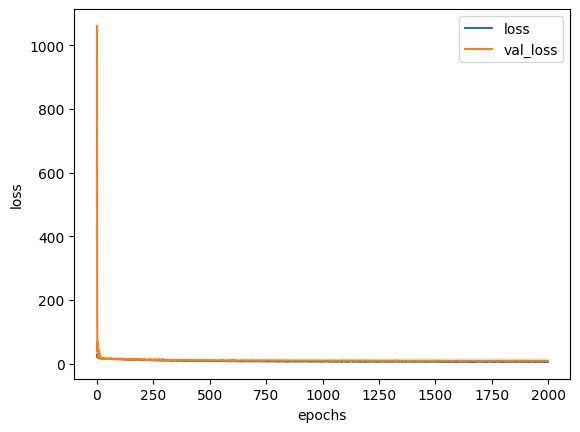

In [23]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['loss', 'val_loss'])
plt.show()

In [166]:
model.save("osj_test6.h5")

In [ ]:
# X = tf.keras.layers.Input(shape=[9])

# H = tf.keras.layers.Dense(120)(X)
# H = tf.keras.layers.BatchNormalization(epsilon=1e-7)(H)
# H = tf.keras.layers.Activation(tf.nn.swish)(H)
# dropout = tf.keras.layers.Dropout(rate=0.3)(H)

# H = tf.keras.layers.Dense(100)(dropout)
# H = tf.keras.layers.BatchNormalization(epsilon=1e-6)(H)
# H = tf.keras.layers.Activation(tf.nn.swish)(H)

# H = tf.keras.layers.Dense(90)(H)
# H = tf.keras.layers.BatchNormalization(epsilon=1e-5)(H)
# H = tf.keras.layers.Activation(tf.nn.swish)(H)


# Y = tf.keras.layers.Dense(1)(H)
# model = tf.keras.models.Model(X,Y)

# # Adam = tf.keras.optimizers.Adam(learning_rate=0.01,beta_1=0.8,beta_2=0.85)
# # model.compile(optimizer=Adam,loss='mae')

# # sgd = tf.keras.optimizers.SGD(learning_rate=0.05,momentum=0.7)
# # model.compile(optimizer=sgd,loss='mae')

# Adagrad = tf.keras.optimizers.Adagrad(learning_rate=0.1) #(lr=0.01, initial_accumulator_value=0.2, epsilon=None, decay=0.1)
# model.compile(optimizer=Adagrad, loss='mae') #, metrics=['accuracy']